In [2]:
# importing packages
from understatscraper import Understat
import pandas as pd
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import warnings
from highlight_text import fig_text
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
import dataframe_image as dfi
from PIL import Image
import cv2
from matplotlib.pyplot import figure
import seaborn as sns

In [5]:
# instance of the class

understat = Understat()

### Seasons of Batshuayi between 2015 and 2021

- 2015-16 Ligue 1 Marseille
- 2016-18 EPL Chelsea
- 2017-18 Bundesliga Borussia Dortmund (half season loan)
- 2018-19 La Liga Valencia (half season loan)
- 2018-19 EPL Crystal Palace (half season loan)
- 2019-20 EPL Chelsea
- 2020-21 EPL Crystal Palace

In [6]:
ligues = ['Ligue 1','EPL','EPL','Bundesliga','La liga','EPL','EPL','EPL']
seasons = [2015,2016,2017,2017,2018,2018,2019,2020]

In [7]:
# creating dataframe by iterating through two lists
df = pd.DataFrame()
for l,s in zip(ligues,seasons):
    df_b = understat.season(l,s,player="Michy Batshuayi")
    df = df.append(df_b)

In [9]:
df.to_csv('batshuayi.csv')

### Inspecting dataframe

In [11]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,61453,7,MissedShots,0.8730000305175781,0.5829999923706055,0.12163817882537842,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Throughball
2,61458,25,BlockedShot,0.909000015258789,0.675,0.06413242965936661,Michy Batshuayi,h,1678,OpenPlay,2015,LeftFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Florian Thauvin,Pass
3,61460,29,SavedShot,0.919000015258789,0.555,0.08026830852031708,Michy Batshuayi,h,1678,FromCorner,2015,Head,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,Abdel Barrada,Cross
5,61462,38,BlockedShot,0.9230000305175782,0.48200000762939454,0.5214341878890991,Michy Batshuayi,h,1678,FromCorner,2015,RightFoot,1871,Marseille,Caen,0,1,2015-08-08 23:00:00,None,None
11,61709,82,MissedShots,0.7559999847412109,0.39799999237060546,0.01823040470480919,Michy Batshuayi,a,1678,OpenPlay,2015,RightFoot,1886,Reims,Marseille,1,0,2015-08-16 16:00:00,None,TakeOn


In [12]:
# resetting index
df.reset_index(drop=True,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               253 non-null    object
 1   minute           253 non-null    object
 2   result           253 non-null    object
 3   X                253 non-null    object
 4   Y                253 non-null    object
 5   xG               253 non-null    object
 6   player           253 non-null    object
 7   h_a              253 non-null    object
 8   player_id        253 non-null    object
 9   situation        253 non-null    object
 10  season           253 non-null    object
 11  shotType         253 non-null    object
 12  match_id         253 non-null    object
 13  h_team           253 non-null    object
 14  a_team           253 non-null    object
 15  h_goals          253 non-null    object
 16  a_goals          253 non-null    object
 17  date             253 non-null    ob

In [14]:
# backup
df2 = df.copy()

In [15]:
df['X'] = pd.to_numeric(df['X'])*100
df['Y'] = pd.to_numeric(df['Y'])*100
df['xG'] = pd.to_numeric(df['xG'])

In [16]:
df.xG.sum()

39.91443486139178

In [17]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
OwnGoal         1
Name: result, dtype: int64

In [18]:
df = df[df['result']!='OwnGoal'] 

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df[df['result'] == 'Goal']['shotType'].value_counts()

RightFoot    20
LeftFoot     16
Head          4
Name: shotType, dtype: int64

In [21]:
df[df['result'] == 'Goal']['situation'].value_counts()

OpenPlay      33
FromCorner     3
Penalty        2
SetPiece       2
Name: situation, dtype: int64

In [22]:
df['result'].value_counts()

MissedShots    83
SavedShot      68
BlockedShot    55
Goal           40
ShotOnPost      6
Name: result, dtype: int64

In [23]:
df = df[df['situation']!='Penalty'].reset_index(drop=True)

In [24]:
df_missed = df[df['result']=='MissedShots'].reset_index(drop=True)
df_saved = df[df['result']=='SavedShot'].reset_index(drop=True)
df_blocked = df[df['result']=='BlockedShot'].reset_index(drop=True)
df_goal = df[df['result']=='Goal'].reset_index(drop=True)
df_post = df[df['result']=='ShotOnPost'].reset_index(drop=True)

In [25]:
df[df.season=='2015']['xG'].sum()

17.055521555244923

In [26]:
mins_90 = 6509/90

In [27]:
np_xGper90 = round(df['xG'].sum()/mins_90,2)

In [28]:
conversion = round(len(df_goal)/len(df),2)

In [29]:
np_xGperShot = round(df['xG'].sum()/len(df),2)

In [30]:
shot90 = round(len(df)/mins_90,2)

### Shotmap

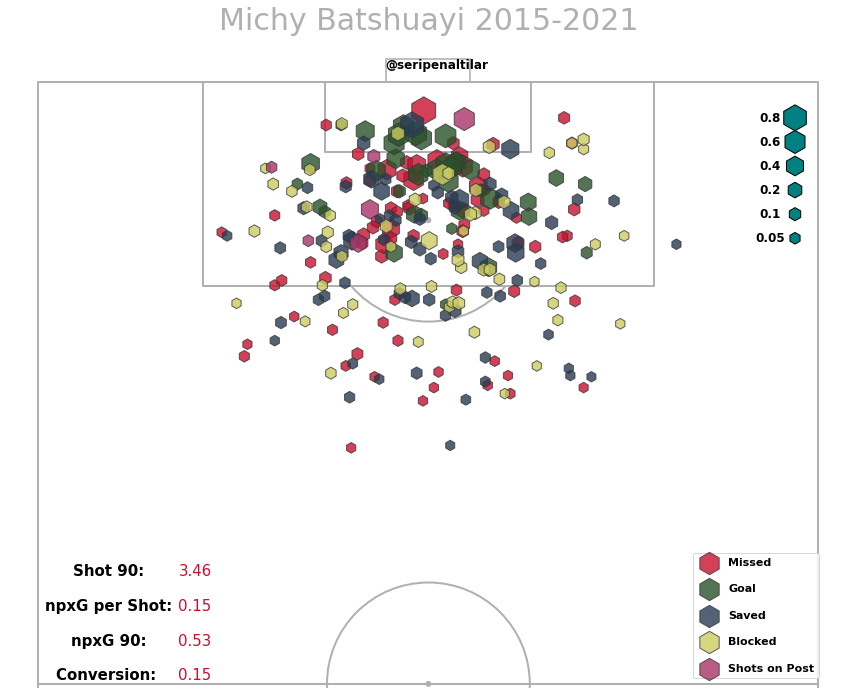

In [31]:
pitch = VerticalPitch(pad_bottom=0.5,
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8,
                     pitch_type='opta')

fig, ax = pitch.draw(figsize=(12, 10))


re = pitch.scatter(df_missed['X'],df_missed['Y'],
                   s=(df_missed["xG"] * 720)+100,
                   alpha=.8,
                   c='#C8102E', 
                   edgecolors='#383838',  # give the markers a charcoal border
                   marker='h',label="Missed",
                   ax=ax)

re1 = pitch.scatter(df_goal["X"],df_goal["Y"],
                   s=(df_goal["xG"] * 720)+100,
                   alpha=.8,
                   c='#285229',
                   edgecolors='#383838',
                   marker='h',label="Goal",
                   ax=ax)

re2 = pitch.scatter(df_saved["X"],df_saved["Y"],
                   s=(df_saved["xG"] * 720)+100,
                   alpha=.8,
                   c='#283b52',
                   edgecolors='#383838',
                   marker='h',label="Saved",
                   ax=ax)

re3 = pitch.scatter(df_blocked["X"],df_blocked["Y"],
                   s=(df_blocked["xG"] * 720)+100,
                   alpha=.8,
                   c='#cccc62',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Blocked")

re4 = pitch.scatter(df_post["X"],df_post["Y"],
                   s=(df_post["xG"] * 720)+100,
                   alpha=.8,
                   c='#AA336A',
                   edgecolors='#383838',
                   marker='h',
                   ax=ax,label="Shots on Post")

#making legends equal size
legend = ax.legend(bbox_to_anchor=(0.97, 0.22),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]
legend.legendHandles[2]._sizes = [500]
legend.legendHandles[3]._sizes = [500]
legend.legendHandles[4]._sizes = [500]


txt = ax.text(x=50, y=105, s='Michy Batshuayi 2015-2021',
              size=30,
              color=pitch.line_color,
              va='center', ha='center')

mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]
mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]
plt.scatter(mx,my,s=mSizeS,facecolors="teal", edgecolor="black",marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+ 3.2, my[i], mSize[i], fontsize=12, c="black",ha="center", va="center",fontweight='bold')

fig.text(x=0.13, y=0.13, s='Shot 90:\n\nnpxG per Shot:\n\nnpxG 90:\n\nConversion: ' , va='center',
                  ha='center', size=15, c='black',fontweight="bold")

fig.text(x=0.23, y=0.13, s="{}\n\n{}\n\n{}\n\n{}".format(shot90,np_xGperShot,np_xGper90,conversion), va='center',
                  ha='center', size=15, color='#C8102E')

plt.figtext(0.45,0.9,'@seripenaltilar',fontweight="bold",fontsize=12)

plt.savefig('shotmap_bats.jpg', facecolor='w')
plt.show()

### xG Flow Chart

In [32]:
df['Goal'] = np.where(df['result']=='Goal',1,0)

In [33]:
goals_bats = df['Goal'].cumsum().tolist()
xG_bats = df['xG'].cumsum().tolist()

In [34]:
df['goalcumulative'] = goals_bats
df['xgcumulative'] = xG_bats
df['date'] = pd.to_datetime(df['date'])

In [35]:
# preparing annotations
xg1 = df[df['season'] == '2015'].iloc[0]['xgcumulative'] # Marseille
xg2 = df[df['season'] == '2015'].iloc[-1]['xgcumulative'] # Chelsea
xg3 = df[df['date'] == '2018-02-02 19:30:00'].iloc[0]['xgcumulative'] # Dortmund
xg4 = df[df['season'] == '2018'].iloc[0]['xgcumulative'] # Valencia
xg5 = df[df['date'] == '2019-02-02 15:00:00'].iloc[0]['xgcumulative'] # Crystal Palace
xg6 = df[df['season'] == '2019'].iloc[0]['xgcumulative'] # Chelsea
xg7 = df[df['season'] == '2020'].iloc[0]['xgcumulative'] # Crystal Palace

xg_list = [xg1,xg2,xg3,xg4,xg5,xg6,xg7]

In [36]:
d1 = df[df['season'] == '2015'].iloc[0]['date']
d2 = df[df['season'] == '2015'].iloc[-1]['date']
d3 = df[df['date'] == '2018-02-02 19:30:00'].iloc[0]['date']
d4 = df[df['season'] == '2018'].iloc[0]['date']
d5 = df[df['date'] == '2019-02-02 15:00:00'].iloc[0]['date']
d6 = df[df['season'] == '2019'].iloc[0]['date']
d7 = df[df['season'] == '2020'].iloc[0]['date']

date_list = [d1,d2,d3,d4,d5,d6,d7]

In [37]:
teams = ['M','CH','BD','V','CP','CH','CP']

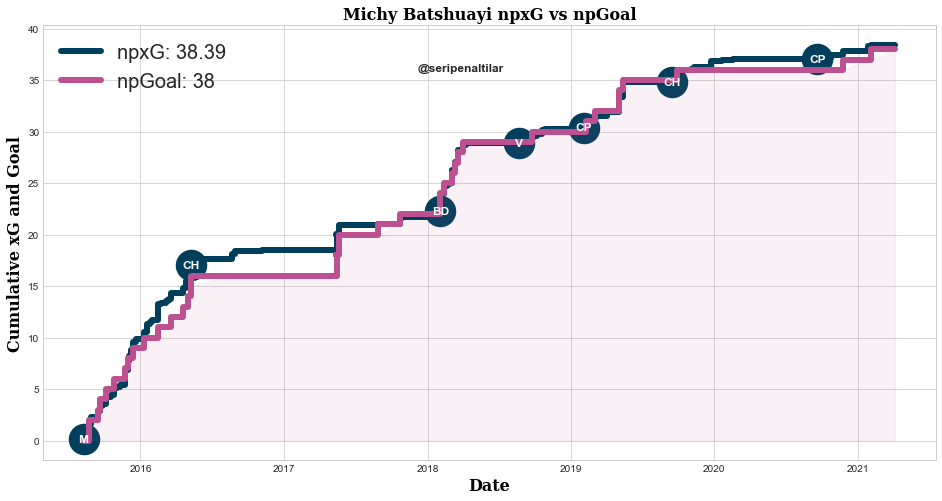

In [38]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(figsize=(16,8))


ax.step(x = df['date'] ,y = xG_bats, c = '#003f5c' ,linewidth = 6)
ax.step(x = df['date'] ,y = goals_bats, c = '#bc5090' ,linewidth = 6)


ax.scatter(x=date_list,y=xg_list, color='#003f5c', edgecolor='#003f5c',s=900,linewidths=1.5)

for i in range(len(xg_list)):
    plt.annotate(teams[i], (date_list[i], xg_list[i]),c='white',size=12,ha='center',va='center',fontweight='bold')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal',fontdict=font)
plt.title('Michy Batshuayi npxG vs npGoal',fontdict=font)

plt.fill_between(df['date'],goals_bats, alpha=0.08, color='#bc5090')

ax.legend(['npxG: {}'.format(round(max(xG_bats),2)), 'npGoal: {}'.format(max(goals_bats))],loc="best",fontsize=20)

plt.figtext(0.45,0.8,'@seripenaltilar',fontweight='bold',fontsize=12)

plt.savefig('xgflowchart_bats.jpg', facecolor='w')
plt.show()

### Comparing Seasons

In [39]:
# Batshuayi npxG cumulative 9.01 for Besiktas as 02/02/2022, source: statsbomb
# Batshuayi total minutes 1546 for Besiktas
# Batshuayi 6 total npGoals as 02/02/2022
# Batshuayi np shots 90 3.72, source whoscored
# Batshuayi total np shot 64

npxG90_bjk = round(9.01/(1546/90),2)
shots90_bjk = 3.72
conversion_bjk = round(6/64,2)
npxG_shot_bjk = round(9.01/64,2)

In [40]:
# Batshuayi Marseille 2015 season
# 2941 minutes, understat

npxG90_2015 = round(df[df['season']=='2015']['xG'].sum()/(2941/90),2)
shots90_2015 = round(len(df[df['season']=='2015'])/(2941/90),2)
conversion_2015 = round(len(df[(df['season']=='2015') & (df['result']=='Goal')])/len(df[df['season']=='2015']),2)
npxG_shot_2015 = round(df[df['season']=='2015']['xG'].sum()/ len(df[df['season']=='2015']),2)

In [41]:
# rows
rows = ['np xG 90','np Shots 90','np Conversion','np xG per Shot']

In [42]:
bats = np.array([[npxG90_2015,npxG90_bjk],[shots90_2015,shots90_bjk],[conversion_2015,conversion_bjk],[npxG_shot_2015,npxG_shot_bjk]])
df_bats = pd.DataFrame(data=bats, index=rows, columns=["Marseille 15/16", "Besiktas 21/22"])

In [43]:
def comparing_rows(row):    

    highlight = 'background-color: lightcoral;'
    default = ''
    equal = 'background-color: lightblue;'

    # must return one string per cell in this row
    if row['Marseille 15/16'] > row['Besiktas 21/22']:
        return [highlight, default]
    elif row['Besiktas 21/22'] > row['Marseille 15/16']:
        return [default, highlight]
    else:
        return [equal, equal]

In [44]:
df_bats_table = df_bats.style.apply(comparing_rows,axis=1).format("{:.3}")

In [49]:
#dfi.export(df_bats_table, 'df_bats.jpg')

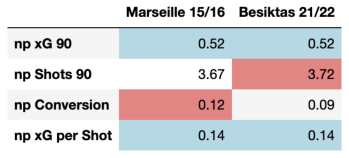

In [48]:
image = cv2.imread("df_bats.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Scatter Plots from fbref np xG vs np Goal

In [50]:
#scraping fbref data, reference to geek culture on medium
#https://medium.com/geekculture/an-introduction-to-football-player-dashboards-using-python-and-matplotlib-eb5328dfe85f

def readfromhtml(filepath):
    df = pd.read_html(filepath)[0]
    column_lst = list(df.columns)
    for index in range(len(column_lst)):
        column_lst[index] = column_lst[index][1]
        
    df.columns = column_lst
    df.drop(df[df['Player'] == 'Player'].index, inplace=True)
    df = df.fillna('0')
    df.set_index('Rk', drop=True, inplace=True)
    try:
        df['Comp'] = df['Comp'].apply(lambda x: ' '.join(x.split()[1:]))
        df['Nation'] = df['Nation'].astype(str
        df['Nation'] = df['Nation'].apply(lambda x: x.split()[-1])
    except:
        print('Error in uploading file:' + filepath)
    finally:
        df = df.apply(pd.to_numeric, errors='ignore')
        return df

df_fbref = readfromhtml('https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats')

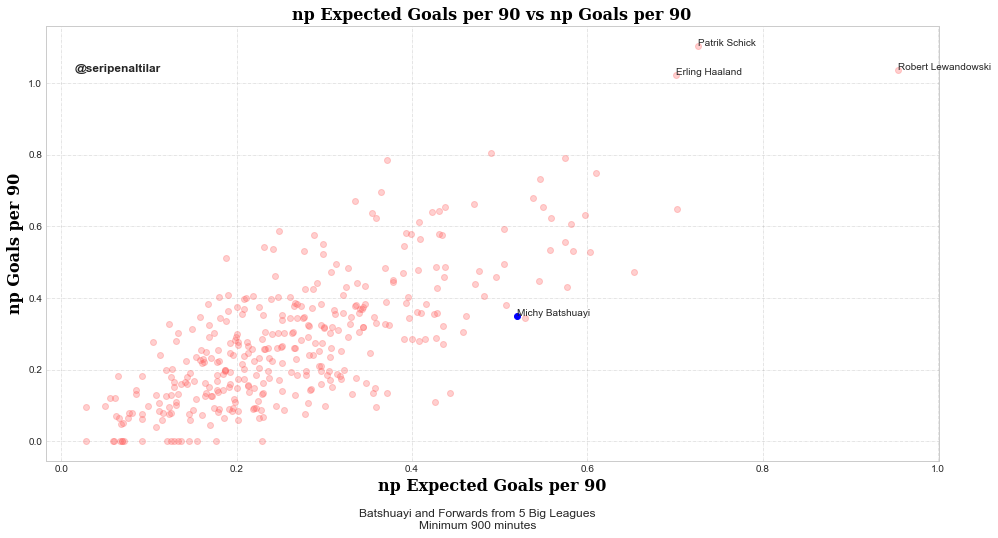

In [51]:
# creating scatter
fig,ax = plt.subplots(figsize=(16,8))


min_90s = 10
df_scatter = df_fbref[df_fbref['90s']>=min_90s]
df_scatter = df_scatter[df_scatter['Pos'].apply(lambda x: x in ['FW','MF,FW','FW,MF'])]
df_scatter['x'] = df_scatter['npxG']/df_scatter['90s']
df_scatter['y'] = (df_scatter['Gls']-df_scatter['PK'])/df_scatter['90s']
x,y = (df_scatter['x'], df_scatter['y'])
ax.scatter(x,y,alpha=0.3,c='#ff6361')
ax.annotate('Robert Lewandowski',(df_scatter[df_scatter['Player']=='Robert Lewandowski']['x'],df_scatter[df_scatter['Player']=='Robert Lewandowski']['y']))
ax.annotate('Patrik Schick',(df_scatter[df_scatter['Player']=='Patrik Schick']['x'],df_scatter[df_scatter['Player']=='Patrik Schick']['y']))
ax.annotate('Erling Haaland',(df_scatter[df_scatter['Player']=='Erling Haaland']['x'],df_scatter[df_scatter['Player']=='Erling Haaland']['y']))


goal90_bjk = round(6/(1546/90),2)
ax.scatter(npxG90_bjk, goal90_bjk, c='blue')
ax.annotate('Michy Batshuayi',(npxG90_bjk,goal90_bjk))

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.4)
ax.set_xlabel('np Expected Goals per 90', fontdict=font)
ax.set_ylabel('np Goals per 90', fontdict=font)

plt.title("np Expected Goals per 90 vs np Goals per 90",fontdict=font)

plt.figtext(0.5, 0.01, 'Batshuayi and Forwards from 5 Big Leagues\nMinimum 900 minutes', wrap=True, horizontalalignment='center', fontsize=12)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold')

plt.savefig('scatter_bats.jpg', facecolor='w')

plt.show()

### np Conversion vs np Goal

In [53]:
df_fbref.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Gls',
       'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')

In [54]:
df_fbref['90s']

Rk
1       24.7
2       22.1
3       22.1
4       23.2
5        0.5
6        6.9
7        1.1
8       25.5
9        6.2
10      18.2
11       1.4
12      18.4
13      16.3
14      12.0
15       3.7
16       3.9
17      12.4
18      19.8
19       0.5
20       5.7
21      16.2
22       4.0
23      16.5
24       5.7
25      21.9
26       1.7
27      15.1
28       0.1
29       0.7
30       4.0
31       6.5
32      17.3
33      11.8
34      13.3
35      13.9
36      21.2
37      17.4
38      11.1
39       0.1
40       7.5
41       1.4
42       0.5
43       2.1
44       3.4
45      11.7
46      23.9
47       1.8
48      14.7
49       4.0
50      17.6
51       0.2
52      19.0
53      21.0
54      10.1
55       5.2
56       9.9
57       4.3
58      19.0
59       5.6
60       5.0
61      20.1
62      23.7
63       0.2
64      15.1
65      25.0
66      19.6
67      11.1
68       7.3
69       1.3
70      11.0
71      16.1
72       6.8
73       0.1
74      12.5
75       2.8
76       4.0
77       